In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

import functions

In [2]:
plt.style.use('ggplot')

In [3]:
seed = 42

## **Data Analysis and Visualization**

In [4]:
# Cargar el conjunto de datos
data = np.loadtxt('data/sample24.dat')

In [5]:
# Número de observaciones en la muestra
n_obs = data.shape[0]
print(f'n_obs = {n_obs}')

n_obs = 300


In [6]:
# Primeras cinco observaciones
print(f'[x0, x1, x2, x3, x4] = {data[:5]}')

[x0, x1, x2, x3, x4] = [2.21370058 2.87122973 4.03110501 4.28833655 0.20205126]


In [7]:
# Estimaciones Muéstrales

mean = np.mean(data)
variance = np.var(data)
min = np.min(data)
q1 = np.quantile(data, 0.25)
median = np.median(data)
q3 = np.quantile(data, 0.75)
max = np.max(data)
skewness = stats.skew(data)

print(f'mean = {mean}')
print(f'variance = {variance}\n')
print(f'min = {min}')
print(f'q1 = {q1}')
print(f'median = {median}')
print(f'q3 = {q3}')
print(f'max = {max}\n')
print(f'skewness = {skewness}')

mean = 3.0179812587666666
variance = 3.1990658013234237

min = 0.11112802
q1 = 1.729471145
median = 2.83624832
q3 = 4.0303351874999995
max = 13.34285563

skewness = 1.398714871716441


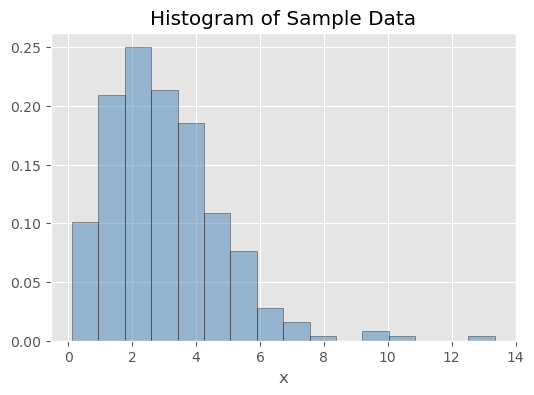

In [8]:
plt.figure(figsize=(6, 4))

plt.hist(data, bins=16, density=True, color='steelblue', edgecolor='black', alpha=0.5)

plt.title('Histogram of Sample Data')
plt.xlabel('x')

plt.show()

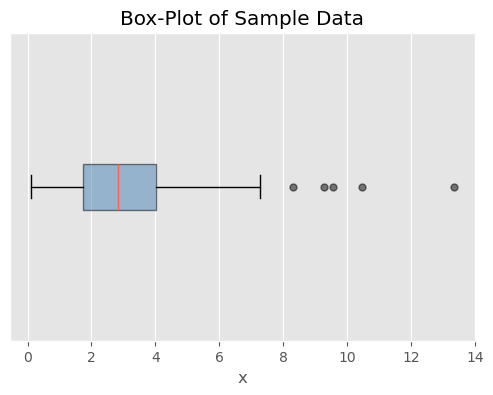

In [9]:
plt.figure(figsize=(6, 4))

plt.boxplot(data, vert=False, patch_artist=True, 
            boxprops=dict(facecolor='steelblue', alpha=0.5),
            medianprops=dict(color='tomato'),
            flierprops=dict(marker='o', markerfacecolor='black', markersize=5, alpha=0.5))

plt.title('Box-Plot of Sample Data')
plt.xlabel('x') 

plt.yticks(())

plt.show()

## **Goodness of Fit**

### **Log-Normal Distribution**

$H_0:$ La muestra proviene de una v.a $X$ con distribución *Log-Normal* de parámetros $\mu$ y $\sigma$ desconocidos.

$H_1:$ La muestra NO proviene de una v.a $X$ con distribución *Log-Normal*.


In [10]:
# Distribución Log-Normal
lognorm_pdf = lambda x, mu, sigma: (x * sigma * np.sqrt(2*np.pi))**(-1) * np.exp(- (np.log(x) - mu)**2 / (2 * sigma**2))
lognorm_cdf = lambda x, mu, sigma: stats.norm.cdf((np.log(x) - mu) / sigma)

# Estimar parámetros usando el Método de Máxima Verosimilitud
log_data = np.log(data)

mu_hat = np.mean(log_data)
sigma_hat = np.std(log_data)

print(f'mu_hat = {mu_hat}\nsigma_hat = {sigma_hat}')

mu_hat = 0.907760881529684
sigma_hat = 0.6912636929475174


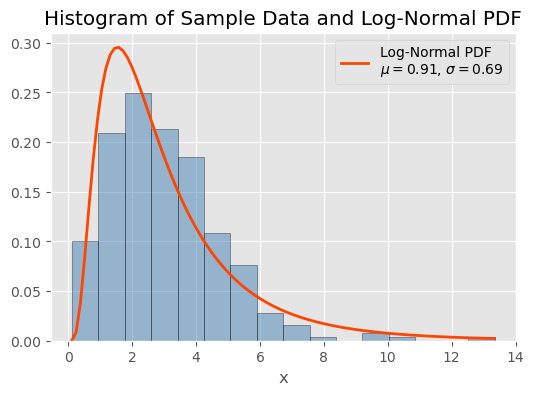

In [11]:
plt.figure(figsize=(6, 4))

plt.hist(data, bins=16, density=True, color='steelblue', edgecolor='black', alpha=0.5)

x = np.linspace(min, max, 100)
y = lognorm_pdf(x, mu_hat, sigma_hat)
plt.plot(x, y, linewidth=2, color='orangered', label=f'Log-Normal PDF\n$\mu={mu_hat:.2f}$, $\sigma={sigma_hat:.2f}$')

plt.title('Histogram of Sample Data and Log-Normal PDF')
plt.xlabel('x')

plt.legend()

plt.show()

#### **Pearson's Chi-Squared Test**

In [12]:
k = 8 # Número de agrupamientos
m = 2 # Número de parametros estimados

# Determinar los bins
bin_edges = np.linspace(min, max, k+1)

# Calcular las frecuencias observadas
freq_obs, _ = np.histogram(data, bins=bin_edges)

# Calcular las frecuencias esperadas
freq_exp = np.diff(lognorm_cdf(bin_edges, mu_hat, sigma_hat)) * n_obs

# Estadístico Chi-Cuadrado
t_obs = functions.ChiSquared(freq_obs, freq_exp)
print(f'Estadístico Chi-Cuadrado: {t_obs}')

Estadístico Chi-Cuadrado: 19.05257106044046


In [13]:
# Test Chi-Cuadrado de Pearson 
p_value = stats.chi2.sf(t_obs, df=k-m-1)
print(f'- Test Chi-Cuadrado de Pearson\np-value = {p_value}')

- Test Chi-Cuadrado de Pearson
p-value = 0.0018792750788543485


In [14]:
np.random.seed(seed)

# Simulación

_, p_value = functions.ChiSquared_LogNormal(data, n_obs, mu_hat, sigma_hat, bin_edges, Nsim=100000)

print(f'- Simulación\np-value = {p_value}')

- Simulación
p-value = 0.00387


#### **Kolmogorov–Smirnov Test**

In [15]:
F_hat = lambda x: stats.norm.cdf((np.log(x) - mu_hat) / sigma_hat)

d_obs = functions.Kolmogorov_Smirnov(data, F_hat)
print(f'Estadístico K-S: {d_obs}')

Estadístico K-S: 0.0834832377333607


In [16]:
np.random.seed(seed)

# Simulación 1 - Distribución Uniforme

_, p_value = functions.KSTest_Uniform(data, n_obs, F_hat, Nsim=100000)
print(f'- Simulación 1 - Distribución Uniforme\np-value = {p_value}\n')

- Simulación 1 - Distribución Uniforme
p-value = 0.0282



In [17]:
np.random.seed(seed)

# Simulación 2 - Distribución Log-Normal

_, p_value = functions.KSTest_LogNormal(data, n_obs, mu_hat, sigma_hat, F_hat, Nsim=10000)
print(f'- Simulación 2 - Distribución Log-Normal\np-value = {p_value}')

- Simulación 2 - Distribución Log-Normal
p-value = 0.0


### **Gamma Distribution**

$H_0:$ La muestra proviene de una v.a $X$ con distribución *Gamma* de parámetros $\alpha$ y $\beta$ desconocidos.

$H_1:$ La muestra NO proviene de una v.a $X$ con distribución *Gamma*.

In [18]:
# Distribución Gamma
gamma_pdf = lambda x, alpha, beta: stats.gamma.pdf(x, alpha, scale=beta)
gamma_cdf = lambda x, alpha, beta: stats.gamma.cdf(x, alpha, scale=beta)

# Estimar parámetros usando el Método de Momentos
alpha_hat = mean**2 / variance # Forma
beta_hat = variance / mean # Escala

print(f'alpha_hat = {alpha_hat}\nbeta_hat = {beta_hat}')

alpha_hat = 2.847147087283685
beta_hat = 1.06000187775545


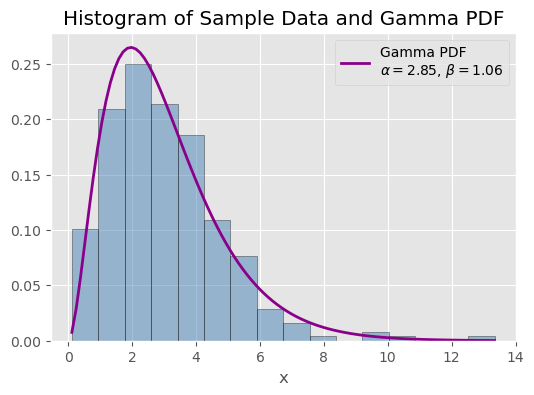

In [19]:
plt.figure(figsize=(6, 4))

plt.hist(data, bins=16, density=True, color='steelblue', edgecolor='black', alpha=0.5)

x = np.linspace(min, max, 100)
y = gamma_pdf(x, alpha_hat, beta_hat)
plt.plot(x, y, linewidth=2, color='darkmagenta', label=f'Gamma PDF\n$\\alpha={alpha_hat:.2f}$, $\\beta={beta_hat:.2f}$')

plt.title('Histogram of Sample Data and Gamma PDF')
plt.xlabel('x')

plt.legend()

plt.show()

#### **Pearson's Chi-Squared Test**

In [20]:
k = 8 # Número de agrupamientos
m = 2 # Número de parametros estimados

# Determinar los bins
bin_edges = np.linspace(min, max, k+1)

# Calcular las frecuencias observadas
freq_obs, _ = np.histogram(data, bins=bin_edges)

# Calcular las frecuencias esperadas
freq_exp = np.diff(gamma_cdf(bin_edges, alpha_hat, beta_hat)) * n_obs

# Estadístico Chi-Cuadrado
t_obs = functions.ChiSquared(freq_obs, freq_exp)
print(f'Estadístico Chi-Cuadrado: {t_obs}')

Estadístico Chi-Cuadrado: 6.092566814120389


In [21]:
# Test Chi-Cuadrado de Pearson 
p_value = stats.chi2.sf(t_obs, df=k-m-1)
print(f'- Test Chi-Cuadrado de Pearson\np-value = {p_value}')

- Test Chi-Cuadrado de Pearson
p-value = 0.2973157088612435


In [22]:
np.random.seed(seed)

# Simulación

_, p_value = functions.ChiSquared_Gamma(data, n_obs, alpha_hat, beta_hat, bin_edges, Nsim=100000)
print(f'- Simulación\np-value = {p_value}')

- Simulación
p-value = 0.31031


#### **Kolmogorov–Smirnov Test**

In [23]:
F_hat = lambda x: stats.gamma.cdf(x, alpha_hat, scale=beta_hat)

d_obs = functions.Kolmogorov_Smirnov(data, F_hat)
print(f'Estadístico K-S: {d_obs}')

Estadístico K-S: 0.044126668386564816


In [24]:
np.random.seed(seed)

# Simulación 1 - Distribución Uniforme

_, p_value = functions.KSTest_Uniform(data, n_obs, F_hat, Nsim=100000)
print(f'- Simulación 1 - Distribución Uniforme\np-value = {p_value}\n')

- Simulación 1 - Distribución Uniforme
p-value = 0.58614



In [25]:
np.random.seed(seed)

# Simulación 2 - Distribución Gamma

_, p_value = functions.KSTest_Gamma(data, n_obs, alpha_hat, beta_hat, F_hat, Nsim=10000)
print(f'- Simulación 2 - Distribución Gamma\np-value = {p_value}\n')

- Simulación 2 - Distribución Gamma
p-value = 0.1734

